<div dir="rtl" style="font-size:16px;">
<b>پیش بینی دیابت با استفاده از الگوریتم های یادگیری با ناظر</b>
<hr>
<b>پروژه درس یادگیری ماشین</b>
<br><br>
<b>استاد:</b> دکتر کتانفروش
<br><br>
<b>دانشجویان:</b> امیرحسین فیروزیان - امین کاظمی
<hr>
داده های مورد استفاده:
</div>    
<a href="https://www.kaggle.com/datasets/amnkzm/diabetes">https://www.kaggle.com/datasets/amnkzm/diabetes</a>
<hr>
<div dir="rtl" style="font-size:16px;">
ابتدا کتابخانه های مورد نیاز را وارد می کنیم:
</div>

In [1]:
import numpy as np
import pandas as pd

<div dir="rtl" style="font-size:16px;">
سپس دیتاست مورد نظر را لود می کنیم:
</div>

In [2]:
df = pd.read_csv('diabetes.csv')

<div dir="rtl" style="font-size:16px;">
<b>بررسی دیتاست</b>
<br><br>
برای اینکه کمی با داده های موجود در دیتاست آشنا شویم، با استفاده از دستورات زیر عناوین هر ستون، تعداد کل داده ها، وجود یا عدم وجود missing value را بررسی می کنیم.
<br><br><hr>
ابتدا با دستور زیر تعداد سطرها و ستون های این دیتاست را مشاهده می کنیم:
</div>

In [3]:
df.shape

(2000, 9)

<div dir="rtl" style="font-size:16px;">
و با دستور زیر عنوان هر ستون را مشاهده می کنیم:
</div>

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<div dir="rtl" style="font-size:16px;">
هما نطور که مشاهده می شود این دیتاست دارای 2000 سطر(داده) و 9 ستون(فیچر) می باشد، که عبارتند از:
<br><br> <b> >>> </b>
تعداد بارداری این افراد  (Pregnancies)
<br><br> <b> >>> </b>
میزان گلوکوز خون (Glucose)
<br><br> <b> >>> </b>
میزان فشار خون (BloodPressure)
<br><br> <b> >>> </b>
ضخامت پوست (SkinThickness)
<br><br> <b> >>> </b>
میزان انسولین (Insulin)
<br><br> <b> >>> </b>
شاخص توده بندی (BMI)
<br><br> <b> >>> </b>
تابع سابقه دیابت در خانواده (DiabetesPedigreeFunction)
<br><br> <b> >>> </b>
سن (Age)
<br><br> <b> >>> </b>
نتیجه (Outcome)
<br><br><hr>
با دستور زیر نوع داده ای هر ستون را مشاهده می کنیم:
</div>

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<div dir="rtl" style="font-size:16px;">
همانطور که مشاهده می شود 7 ستون از نوع اعداد صحیح و 2 ستون از نوع اعداد اعشاری می باشند.
<br><br><hr>
با دستور زیر پنج سطر اول این داده ها را مشاهده می کنیم:
</div>

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


<div dir="rtl" style="font-size:16px;">
با دستور زیر اطلاعات کلی درباره این دیتاست را مشاهده می کنیم:
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


<div dir="rtl" style="font-size:16px;">
با دستور زیر اطلاعات آماری این داده را از قبیل میانگین، واریانس، میانه، مد، چارک ها و ... را بررسی می کنیم:
</div>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


<div dir="rtl" style="font-size:16px;">
با نگاه اجمالی به خروجی دستور قبل، به عنوان مثال می توان دریافت که میانگین قند خون این افراد 121 و فشار خون آن ها 69 می باشد.
<br><br><hr>
با استفاده از دستور زیر نیز می توان به وجود یا عدم وجود missing value پی برد:
</div>

In [9]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<div dir="rtl" style="font-size:16px;">
همانگونه که مشاهده می شود این دیتاست دارای missing value نیست.
<br><br><hr>
برای مختصر نویسی نام ستون (DiabetesPedigreeFunction) را با استفاده از دستور زیر به اختصار (DPF) قرار می دهیم:
</div>

In [10]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


<div dir="rtl" style="font-size:16px;">
کتابخانه های مورد نیاز برای رسم نمودار را با دستور زیر وارد می کنیم:
</div>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div dir="rtl" style="font-size:16px;">
نمودار را براساس داده های برچسب گذاری شده (تارگت) رسم می کنیم:
</div>

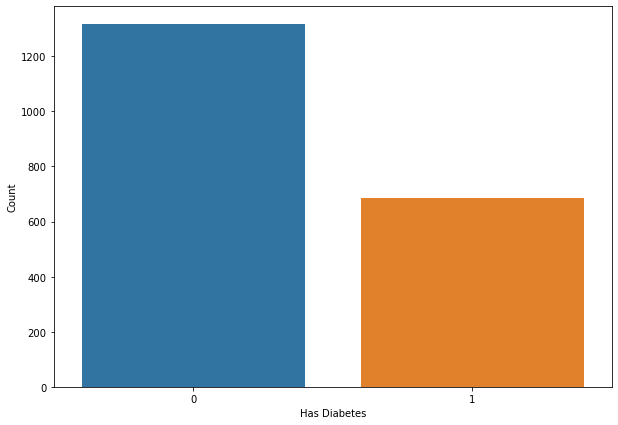

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

<div dir="rtl" style="font-size:16px;">
در این مرحله مقادیر صفر که به معنی اندازه گیری نشده هستند را در ستون های (Glucose, BloodPressure, SkinThickness, Insulin, BMI) برابر NaN (Not a Number) قرار می دهیم:
</div>

In [13]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

<div dir="rtl" style="font-size:16px;">
برای جایگزینی مقادیر NaN با یک مقدار، نیاز به مشخص شدن توزیع داده ها داریم، به همین منظور نمودار هیستوگرام این داده ها را رسم می کنیم:
</div>

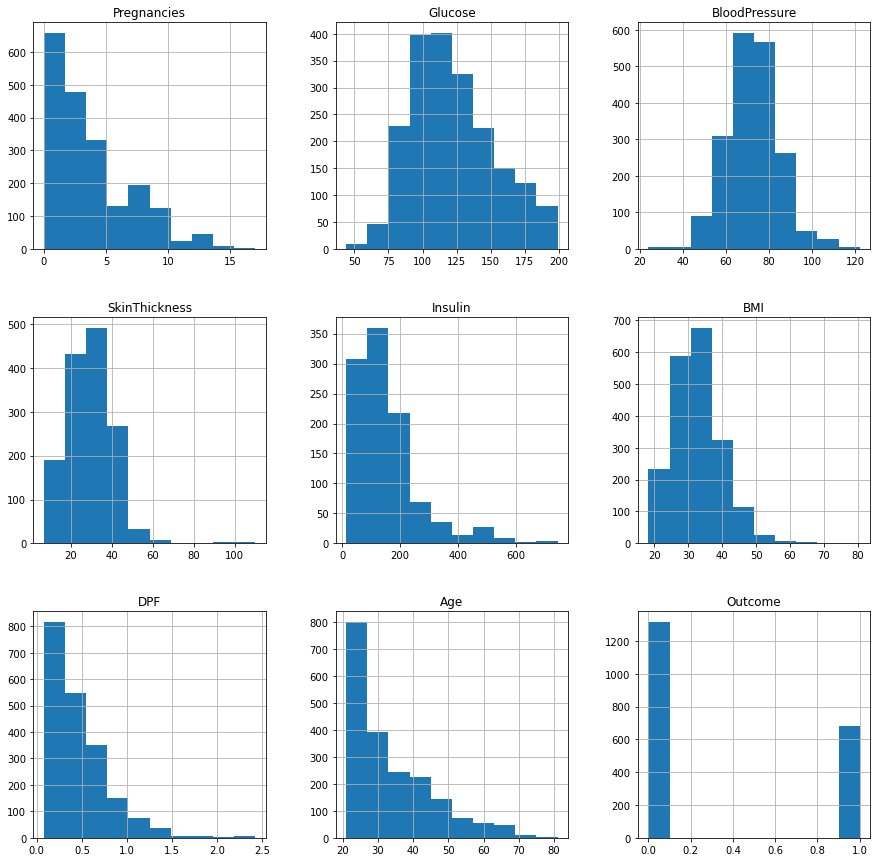

In [14]:
p = df_copy.hist(figsize = (15,15))

<div dir="rtl" style="font-size:16px;">
حال مقدار NaN را در ستون های (Glucose, BloodPressure) با توجه به اینکه توزیع آن ها شبیه توزیع نرمال است برابر با میانگین داده های آن ستون و در ستون های (SkinThickness, Insulin, BMI) برابر با میانه آن ستون قرار می دهیم.
</div>

In [15]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

<div dir="rtl" style="font-size:16px;">
حال دوباره نمودار هیستوگرام داده ها را رسم می کنیم و توزیع داده ها با مقادیر جایگزین شده را مشاهده می کنیم:
</div>

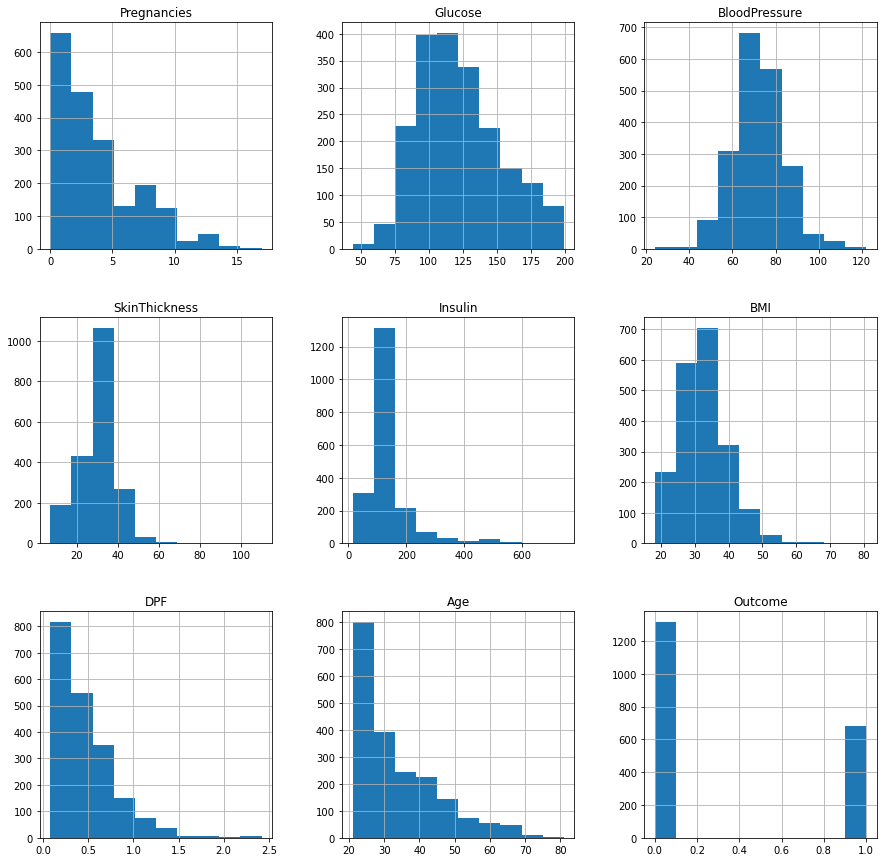

In [16]:
p = df_copy.hist(figsize=(15,15))

<div dir="rtl" style="font-size:16px;">
همانطور که مشاهده می شود نمودار داده ها در ستون های (Glucose, BloodPressure, SkinThickness, Insulin, BMI) به نمودار توزیع نرمال شبیه تر شدند.
<br><br><hr>
حال داده ها را با دستور زیر بررسی می کنیم تا از عدم وجود missing value مطممئن شویم:
</div>

In [17]:
df_copy.isnull().any()

Pregnancies      False
Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
DPF              False
Age              False
Outcome          False
dtype: bool

<div dir="rtl" style="font-size:16px;">
از کتابخانه scikit-learn استفاده می کنیم و داده ها را به دو دسته داده های یادگیری و تست تقسیم می کنیم که 80 درصد داده ها را برای یادگیری و 20 درصد آن ها را برای تست مدل بکار می بریم:
</div>

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


<div dir="rtl" style="font-size:16px;">
از کتابخانه scikit-learn برای هم مقیاس کردن ویژگی ها که تحت عنوان Feature Scaling شناخته می شود استفاده می کنیم:
</div>

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<div dir="rtl" style="font-size:16px;">
<b>آموزش مدل</b><br><br>
با توجه به اینکه خروجی این مساله داشتن یا نداشتن دیابت است یعنی از نوع classification می باشد و در اینجا از سه مدل درخت تصمیم، رگرسیون لجستیک و SVM که مناسب این نوع مساله می باشند استفاده می کنیم.
<br><br><hr>
ابتدا از کتابخانه scikit-learn مدل درخت تصمیم را وارد می کنیم و با ماکزیمم نود 10 این مدل را با داده های یادگیری آموزش می دهیم:
</div>

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

<div dir="rtl" style="font-size:16px;">
حال داده های تست را به این مدل می دهیم و دقت یادگیری مدل را با این داده ها می سنجیم:
</div>

In [21]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.9375


<div dir="rtl" style="font-size:16px;">
بطور مشابه از کتابخانه scikit-learn مدل رگرسیون لجستیک را با داده های یادگیری آموزش می دهیم:
</div>

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
logreg.fit(X_train, y_train)

LogisticRegression()

<div dir="rtl" style="font-size:16px;">
حال داده های تست را به این مدل می دهیم و دقت یادگیری مدل را با این داده ها می سنجیم:
</div>

In [23]:
from sklearn import metrics

predictions = logreg.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.78


<div dir="rtl" style="font-size:16px;">
و در نهایت از کتابخانه scikit-learn مدل SVM را با داده های یادگیری آموزش می دهیم:
</div>

In [24]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<div dir="rtl" style="font-size:16px;">
حال داده های تست را به این مدل می دهیم و دقت یادگیری مدل را با این داده ها می سنجیم:
</div>

In [25]:
from sklearn import metrics

predictions = svc_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.815


<div dir="rtl" style="font-size:16px;">
<b>نتیجه</b>
<br><br>
با توجه به دقت حاصل از یادگیری بر روی داده های تست نتیجه می گیریم که مدل درخت تصمیم از دو مدل دیگر در یادگیری بهتر عمل می کند.
</div>

<div dir="rtl" style="font-size:16px;">
<hr>
از اعتبارسنجی متقابل برای مشخص شدن اینکه تا چه اندازه نتایح قابل تعمیم و مستقل از داده‌های آموزشی است استفاده می کنیم:
</div>

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(criterion="entropy", max_depth=10), X_train, y_train)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 90%


<div dir="rtl" style="font-size:16px;">
ماتریس درهم ریختگی را برای بررسی عملکرد این الگوریتم رسم می نماییم:
</div>

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[266,   6],
       [ 19, 109]], dtype=int64)

<div dir="rtl" style="font-size:16px;">
همانطور که در نمودار این ماتریس مشاهده می شود 266 مورد از داده های تست را که دیابت نداشتند درست تشخیص داده است این مدل و 105 مورد از داده های تست را که دیابت داشتند را نیز درست تشخصی داده است و فقط در 29 مورد از این داده ها تشخیص نادرست بوده است.
</div>

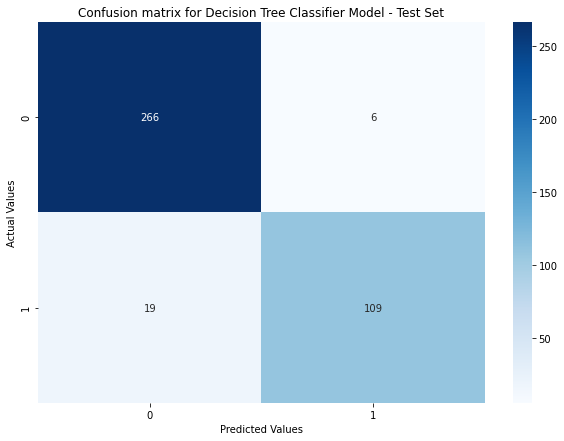

In [28]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<div dir="rtl" style="font-size:16px;">
از این رو میزان دقت این مدل در داده های تست به صورت زیر است:
</div>

In [29]:
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 93.75%


<div dir="rtl" style="font-size:16px;">
حال همین ماتریس را برای داده های یادگیری در این مدل رسم می کنیم و عملکرد آن در داده های یادگیری را مشاهده می نماییم:
</div>

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_train_pred = dtree.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1033,   11],
       [  57,  499]], dtype=int64)

<div dir="rtl" style="font-size:16px;">
همانطور که در نمودار این ماتریس مشاهده می شود 1033 مورد از داده های یادگیری را که دیابت نداشتند درست تشخیص داده است این مدل و 499 مورد از داده های یادگیری را که دیابت داشتند را نیز درست تشخصی داده است و فقط در 68 مورد از این داده ها تشخیص نادرست بوده است.
</div>

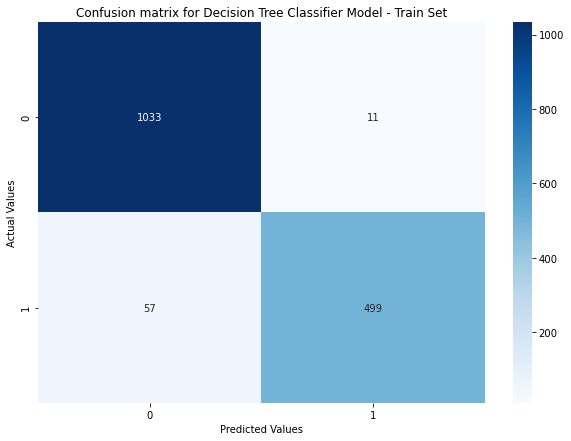

In [31]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<div dir="rtl" style="font-size:16px;">
از این رو میزان دقت این مدل در داده های یادگیری به صورت زیر است:
</div>

In [32]:
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))


Accuracy on trainning set: 95.75%


<div dir="rtl" style="font-size:16px;">
حال تابعی برای پیش بینی با این مدل ایجاد می کنیم که به با وارد کردن مقادیر (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age) به ما بگوید دیابت داریم یا نه!
</div>

In [33]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return dtree.predict(x)

<div dir="rtl" style="font-size:16px;">
به عنوان مثال مقادیر (0, 120, 82, 17, 86, 33, 0.347, 35) را به عنوان ورودی به این تابع می دهیم تا دیابتی بودن یا نبودن ما را با استفاده از مدل مشخص نماید:
</div>

In [34]:
prediction = predict_diabetes(0, 120, 82, 17, 86, 33, 0.347, 35)[0]
if prediction:
  print('متاسفانه دیابت دارید!')
else:
  print("خوشبختانه دیابت ندارید!")

خوشبختانه دیابت ندارید!
